In [ ]:
%pip install --user kaggle 
%pip install --user pandas
%pip install --user scikit-learn
%pip install --user matplotlib
%pip install --user geopandas

In [5]:
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
!kaggle datasets download -d nasa/meteorite-landings

In [3]:
!unzip -o meteorite-landings.zip -d data

Archive:  meteorite-landings.zip
  inflating: data/meteorite-landings.csv  


<h4>Czyszczenie zbioru</h4>

In [6]:
data = pd.read_csv("data/meteorite-landings.csv")
data.head(10)

name   id nametype     recclass      mass  fall    year  \
0               Aachen    1    Valid           L5      21.0  Fell  1880.0   
1               Aarhus    2    Valid           H6     720.0  Fell  1951.0   
2                 Abee    6    Valid          EH4  107000.0  Fell  1952.0   
3             Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0   
4              Achiras  370    Valid           L6     780.0  Fell  1902.0   
5             Adhi Kot  379    Valid          EH4    4239.0  Fell  1919.0   
6  Adzhi-Bogdo (stone)  390    Valid        LL3-6     910.0  Fell  1949.0   
7                 Agen  392    Valid           H5   30000.0  Fell  1814.0   
8               Aguada  398    Valid           L6    1620.0  Fell  1930.0   
9        Aguila Blanca  417    Valid            L    1440.0  Fell  1920.0   

     reclat    reclong               GeoLocation  
0  50.77500    6.08333     (50.775000, 6.083330)  
1  56.18333   10.23333    (56.183330, 10.233330)  
2  54.21667 -113.00000  (54.216670, -113.000000)  
3  16.88333  -99.90000   (16.883330, -99.900000)  
4 -33.16667  -64.95000  (-33.166670, -64.950000)  
5  32.10000   71.80000    (32.100000, 71.800000)  
6  44.83333   95.16667    (44.833330, 95.166670)  
7  44.21667    0.61667     (44.216670, 0.616670)  
8 -31.60000  -65.23333  (-31.600000, -65.233330)  
9 -30.86667  -64.55000  (-30.866670, -64.550000)

Podział na podzbiory

In [7]:
from sklearn.model_selection import train_test_split
meteorite_train, meteorite_test = train_test_split(data, test_size=0.2, random_state=1)
meteorite_train, meteorite_val = train_test_split(meteorite_train, test_size=0.25, random_state=1)

<h4>Statystyki</h4>

Wielkości zbiorów

In [8]:
print(f'wielkość zbioru: {data.shape}')
print(f'wielkość zbioru treningowego: {meteorite_train.shape}')
print(f'wielkość zbioru testującego: {meteorite_test.shape}')
print(f'wielkość zbioru walidacyjnego: {meteorite_val.shape}')

wielkość zbioru: (45716, 10)
wielkość zbioru treningowego: (27429, 10)
wielkość zbioru testującego: (9144, 10)
wielkość zbioru walidacyjnego: (9143, 10)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


Masa meteorytu

In [10]:
print(f'Średnia masa: {data["mass"].mean()}')
print(f'Maksymalna masa: {data["mass"].max()}')
print(f'Minimalna masa: {data["mass"].min()}')

Średnia masa: 13278.078548601516
Maksymalna masa: 60000000.0
Minimalna masa: 0.0


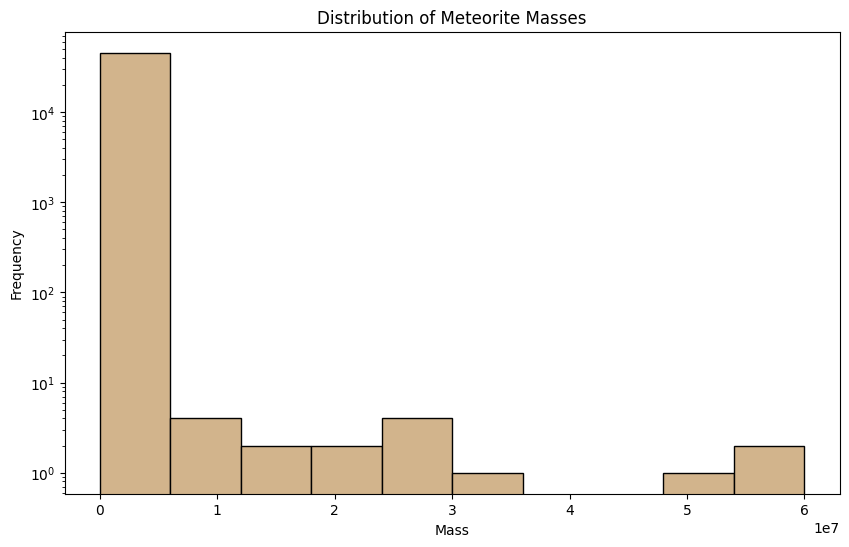

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data["mass"], color= "tan", log= True, edgecolor="black")
plt.title('Distribution of Meteorite Masses')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.legend
plt.show()

In [12]:
data.loc[data['mass'] == 0]

name     id nametype     recclass  mass   fall    year  \
12627                 Gove  52859   Relict  Relict iron   0.0  Found  1979.0   
25551  Miller Range 090478  55953    Valid          CO3   0.0  Found  2009.0   
31060       Österplana 048  56147   Relict    Relict OC   0.0  Found  2004.0   
31061       Österplana 049  56148   Relict    Relict OC   0.0  Found  2012.0   
31062       Österplana 050  56149   Relict    Relict OC   0.0  Found  2003.0   
31063       Österplana 051  56150   Relict    Relict OC   0.0  Found  2006.0   
31064       Österplana 052  56151   Relict    Relict OC   0.0  Found  2006.0   
31065       Österplana 053  56152   Relict    Relict OC   0.0  Found  2002.0   
31066       Österplana 054  56153   Relict    Relict OC   0.0  Found  2005.0   
31067       Österplana 055  56154   Relict    Relict OC   0.0  Found  2008.0   
31068       Österplana 056  56155   Relict    Relict OC   0.0  Found  2008.0   
31069       Österplana 057  56156   Relict    Relict OC   0.0  Found  2009.0   
31070       Österplana 058  56157   Relict    Relict OC   0.0  Found  2009.0   
31071       Österplana 059  56158   Relict    Relict OC   0.0  Found  2009.0   
31072       Österplana 060  56159   Relict    Relict OC   0.0  Found  2009.0   
31073       Österplana 061  56160   Relict    Relict OC   0.0  Found  2009.0   
31074       Österplana 062  56161   Relict    Relict OC   0.0  Found  2010.0   
31075       Österplana 063  56162   Relict    Relict OC   0.0  Found  2010.0   
31076       Österplana 064  56163   Relict    Relict OC   0.0  Found  2011.0   

         reclat    reclong               GeoLocation  
12627 -12.26333  136.83833  (-12.263330, 136.838330)  
25551   0.00000    0.00000      (0.000000, 0.000000)  
31060  58.58333   13.43333    (58.583330, 13.433330)  
31061  58.58333   13.43333    (58.583330, 13.433330)  
31062  58.58333   13.43333    (58.583330, 13.433330)  
31063  58.58333   13.43333    (58.583330, 13.433330)  
31064  58.58333   13.43333    (58.583330, 13.433330)  
31065  58.58333   13.43333    (58.583330, 13.433330)  
31066  58.58333   13.43333    (58.583330, 13.433330)  
31067  58.58333   13.43333    (58.583330, 13.433330)  
31068  58.58333   13.43333    (58.583330, 13.433330)  
31069  58.58333   13.43333    (58.583330, 13.433330)  
31070  58.58333   13.43333    (58.583330, 13.433330)  
31071  58.58333   13.43333    (58.583330, 13.433330)  
31072  58.58333   13.43333    (58.583330, 13.433330)  
31073  58.58333   13.43333    (58.583330, 13.433330)  
31074  58.58333   13.43333    (58.583330, 13.433330)  
31075  58.58333   13.43333    (58.583330, 13.433330)  
31076  58.58333   13.43333    (58.583330, 13.433330)

Wygląda na to, że odnaleziono dużo meteorytów z masą równą 0 w tym samym miejscu. <br>
Po researchu, okazało się, że to nie są niepoprawne wartości. W Szwecji, znaleziono skamieniałe meteoryty, które są bardzo stare (setki miliony lat), przez co nie ma możliwości obliczenia ich masy. 
Źródła:
- https://en.wikipedia.org/wiki/Österplana_065

<h4>Fall</h4>

In [13]:
data["fall"].value_counts() 

fall
Found    44609
Fell      1107
Name: count, dtype: int64

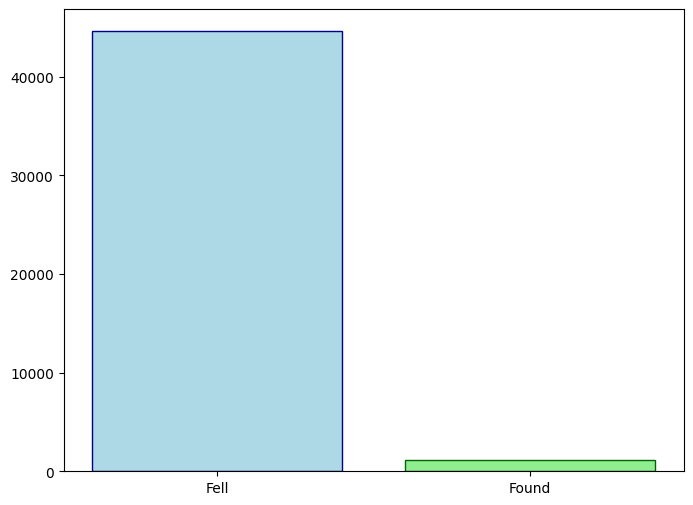

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(["Fell","Found"], data["fall"].value_counts(), color=["lightblue", "lightgreen"], edgecolor= ["darkblue", "darkgreen"])
plt.show()

<h4>Klasa meteorytu</h4>

In [15]:
class_count = data['recclass'].nunique()
print(f'Liczba klas meteorytow: {class_count}')
top_10 = data['recclass'].value_counts().head(10)
print("10 najpopularniejszych klas:")
top_10

Liczba klas meteorytow: 466
10 najpopularniejszych klas:


recclass
L6      8285
H5      7142
L5      4796
H6      4528
H4      4211
LL5     2766
LL6     2043
L4      1253
H4/5     428
CM2      416
Name: count, dtype: int64

<h4>Lokalizacja</h4>

j:\.AppData\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\s464914\AppData\Local\temp\ipykernel_5176\2086382282.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

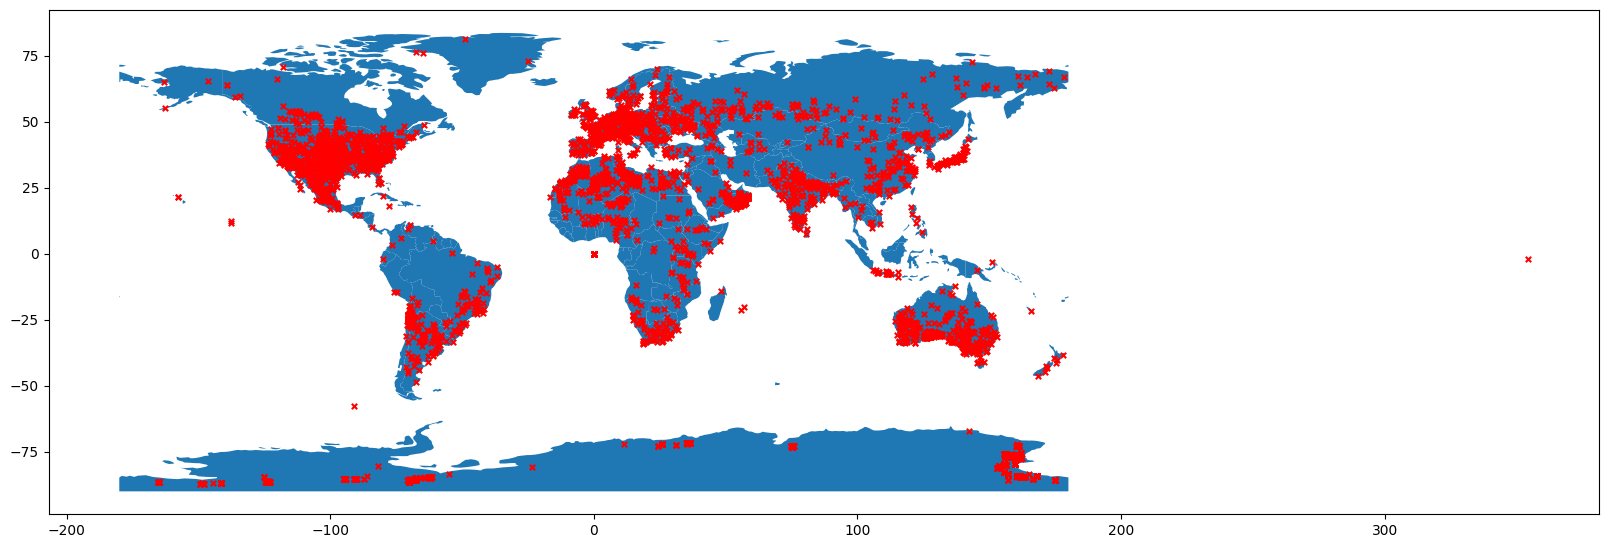

In [19]:
import geopandas as gpd
from shapely.geometry import Point

loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(data['reclong'], data['reclat'])]
geo_df = gpd.GeoDataFrame(data, crs=loc_crs, geometry=loc_geom)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(20, 10)), marker='x', color='red', markersize=15)

<h4>Normalizacja danych</h4>

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

meteorite_train['mass'] = scaler.fit_transform(meteorite_train[['mass']])
meteorite_test['mass'] = scaler.fit_transform(meteorite_test[['mass']])
meteorite_val['mass'] = scaler.fit_transform(meteorite_val[['mass']])

data['mass'] = scaler.fit_transform(data[['mass']])

data['mass']

0       -0.023056
1       -0.021841
2        0.163000
3       -0.019764
4       -0.021736
           ...   
45711   -0.022794
45712   -0.023013
45713   -0.023087
45714   -0.019324
45715   -0.022745
Name: mass, Length: 45716, dtype: float64

<h4>Czyszczenie zbioru</h4>

In [21]:
data.nunique()

name           45716
id             45716
nametype           2
recclass         466
mass           12576
fall               2
year             268
reclat         12738
reclong        14640
GeoLocation    17100
dtype: int64

In [22]:
data.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

Według dokumentacji: 
<br>
reclant - szerokość geograficzna
<br>
reclong - długość geograficzna

In [24]:
filtered_data = data.loc[data['reclat'].isnull() & data['reclong'].isnull() & data['GeoLocation'].isnull()]
filtered_data.shape

(7315, 10)

Wnioski:
Miejsca, w których brakuje zarówno szerokości geograficznej, jak i długości geograficznej, zazwyczaj nie posiadają również informacji o całej geolokacji. Z uwagi na powiązanie tych trzech parametrów, zamiast próbować uzupełniać brakujące dane, wiersze zawierające braki w tych trzech obszarach zostaną usunięte.

In [25]:
data = data.dropna(subset=['reclat'])
meteorite_train = meteorite_train.dropna(subset=['reclat'])
meteorite_test = meteorite_test.dropna(subset=['reclat'])
meteorite_val = meteorite_val.dropna(subset=['reclat'])

data.isna().sum()

name             0
id               0
nametype         0
recclass         0
mass           119
fall             0
year           175
reclat           0
reclong          0
GeoLocation      0
dtype: int64

Według dokumentacji:
- a few entries here contain date information that was incorrectly parsed into the NASA database. As a spot check: any date that is before 860 CE or after 2016 are incorrect; these should actually be BCE years. There may be other errors and we are looking for a way to identify them.
- a few entries have latitude and longitude of 0N/0E (off the western coast of Africa, where it would be quite difficult to recover meteorites). Many of these were actually discovered in Antarctica, but exact coordinates were not given. 0N/0E locations should probably be treated as NA.

In [26]:
data.loc[(data['year'] > 2016) | (data['year'] < 860)]

name     id nametype           recclass      mass  \
16356                 Havana  11857    Valid  Iron, IAB complex       NaN   
30679  Northwest Africa 7701  57150    Valid                CK6 -0.022997   
38188                     Ur  24125    Valid               Iron       NaN   
38301        Wietrzno-Bobrka  24259    Valid               Iron -0.022439   

        fall    year    reclat   reclong              GeoLocation  
16356  Found   301.0  40.33333 -90.05000  (40.333330, -90.050000)  
30679  Found  2101.0   0.00000   0.00000     (0.000000, 0.000000)  
38188  Found  2501.0  30.90000  46.01667   (30.900000, 46.016670)  
38301  Found   601.0  49.41667  21.70000   (49.416670, 21.700000)

In [27]:
data.loc[(data['reclat'] == 0) & (data['reclong'] == 0)]

name     id nametype   recclass      mass   fall  \
37     Northwest Africa 5815  50693    Valid         L5 -0.022646  Found   
596              Mason Gully  53653    Valid         H5 -0.023050   Fell   
1648       Allan Hills 09004  52119    Valid  Howardite -0.022707  Found   
1649       Allan Hills 09005  55797    Valid         L5 -0.022880  Found   
1650       Allan Hills 09006  55798    Valid         H5 -0.022912  Found   
...                      ...    ...      ...        ...       ...    ...   
45655          Yamato 984144  40764    Valid         H6 -0.023028  Found   
45656          Yamato 984145  40765    Valid         L6 -0.022998  Found   
45657          Yamato 984146  40766    Valid         H3 -0.023059  Found   
45658          Yamato 984147  40767    Valid        LL6 -0.022886  Found   
45659          Yamato 984148  40768    Valid         L5 -0.023085  Found   

         year  reclat  reclong           GeoLocation  
37        NaN     0.0      0.0  (0.000000, 0.000000)  
596    2010.0     0.0      0.0  (0.000000, 0.000000)  
1648   2009.0     0.0      0.0  (0.000000, 0.000000)  
1649   2009.0     0.0      0.0  (0.000000, 0.000000)  
1650   2009.0     0.0      0.0  (0.000000, 0.000000)  
...       ...     ...      ...                   ...  
45655  1998.0     0.0      0.0  (0.000000, 0.000000)  
45656  1998.0     0.0      0.0  (0.000000, 0.000000)  
45657  1998.0     0.0      0.0  (0.000000, 0.000000)  
45658  1998.0     0.0      0.0  (0.000000, 0.000000)  
45659  1998.0     0.0      0.0  (0.000000, 0.000000)  

[6214 rows x 10 columns]

In [28]:
incorrect_years_index  = data.loc[(data['year'] > 2016) | (data['year'] < 860)].index
incorrect_location_index  = data.loc[(data['reclat'] == 0) & (data['reclong'] == 0)].index

incorrect_years_index_train  = meteorite_train.loc[(meteorite_train['year'] > 2016) | (meteorite_train['year'] < 860)].index
incorrect_location_index_train  = meteorite_train.loc[(meteorite_train['reclat'] == 0) & (meteorite_train['reclong'] == 0)].index

incorrect_years_index_test  = meteorite_test.loc[(meteorite_test['year'] > 2016) | (meteorite_test['year'] < 860)].index
incorrect_location_index_test  = meteorite_test.loc[(meteorite_test['reclat'] == 0) & (meteorite_test['reclong'] == 0)].index

incorrect_years_index_val  = meteorite_val.loc[(meteorite_val['year'] > 2016) | (meteorite_val['year'] < 860)].index
incorrect_location_index_val  = meteorite_val.loc[(meteorite_val['reclat'] == 0) & (meteorite_val['reclong'] == 0)].index

data.drop(incorrect_years_index.union(incorrect_location_index), inplace=True)
meteorite_test.drop(incorrect_years_index_test.union(incorrect_location_index_test), inplace=True)
meteorite_train.drop(incorrect_years_index_train.union(incorrect_location_index_train), inplace=True)
meteorite_val.drop(incorrect_years_index_val.union(incorrect_location_index_val), inplace=True)

In [29]:
data.isna().sum()

name             0
id               0
nametype         0
recclass         0
mass           117
fall             0
year           147
reclat           0
reclong          0
GeoLocation      0
dtype: int64

We wcześniejszych obserwacjach zostało zauważone, że wszystkie meteoryty odnalezione w Szwecji, Österplana mają niską mase przez brak możliwości jej obliczenia. Dlatego wszystkie meteoryty odnalezione w tym miejscu z masą Null zostaną dopisane do tej grupy przypisując im mase 0

In [30]:
data.loc[(data['mass'].isnull()) & (data['name'].str.startswith('Österplana'))]

name     id nametype   recclass  mass   fall    year  \
31014  Österplana 002  44802   Relict  Relict OC   NaN  Found  1993.0   
31015  Österplana 003  44803   Relict  Relict OC   NaN  Found  1993.0   
31016  Österplana 004  44804   Relict  Relict OC   NaN  Found  1994.0   
31017  Österplana 005  44805   Relict  Relict OC   NaN  Found  1990.0   
31018  Österplana 006  44806   Relict  Relict OC   NaN  Found     NaN   
31019  Österplana 007  44807   Relict  Relict OC   NaN  Found  1993.0   
31020  Österplana 008  44808   Relict  Relict OC   NaN  Found  1995.0   
31021  Österplana 009  44809   Relict  Relict OC   NaN  Found  1996.0   
31022  Österplana 010  44810   Relict  Relict OC   NaN  Found  1995.0   
31023  Österplana 011  44811   Relict  Relict OC   NaN  Found  1997.0   
31024  Österplana 012  44812   Relict  Relict OC   NaN  Found  1996.0   
31025  Österplana 013  44813   Relict  Relict OC   NaN  Found  1996.0   
31026  Österplana 014  44814   Relict  Relict OC   NaN  Found  1996.0   
31027  Österplana 015  44815   Relict  Relict OC   NaN  Found  1996.0   
31028  Österplana 016  44816   Relict  Relict OC   NaN  Found  1996.0   
31029  Österplana 017  44817   Relict  Relict OC   NaN  Found  1997.0   
31030  Österplana 018  44818   Relict  Relict OC   NaN  Found  1996.0   
31031  Österplana 019  44819   Relict  Relict OC   NaN  Found  1997.0   
31032  Österplana 020  44820   Relict  Relict OC   NaN  Found  1997.0   
31033  Österplana 021  44821   Relict  Relict OC   NaN  Found  1997.0   
31034  Österplana 022  44822   Relict  Relict OC   NaN  Found  1999.0   
31035  Österplana 023  44823   Relict  Relict OC   NaN  Found  1999.0   
31036  Österplana 024  44824   Relict  Relict OC   NaN  Found  1999.0   
31037  Österplana 025  44825   Relict  Relict OC   NaN  Found  2000.0   
31038  Österplana 026  44826   Relict  Relict OC   NaN  Found  2000.0   
31039  Österplana 027  44827   Relict  Relict OC   NaN  Found  2000.0   
31040  Österplana 028  44828   Relict  Relict OC   NaN  Found  2000.0   
31041  Österplana 029  44829   Relict  Relict OC   NaN  Found  1998.0   
31042  Österplana 030  44830   Relict  Relict OC   NaN  Found  1994.0   
31043  Österplana 031  44831   Relict  Relict OC   NaN  Found  1998.0   
31044  Österplana 032  44832   Relict  Relict OC   NaN  Found  2000.0   
31045  Österplana 033  44833   Relict  Relict OC   NaN  Found  2000.0   
31046  Österplana 034  44834   Relict  Relict OC   NaN  Found  1998.0   
31047  Österplana 035  44835   Relict  Relict OC   NaN  Found  1996.0   
31048  Österplana 036  44836   Relict  Relict OC   NaN  Found  1996.0   
31049  Österplana 037  44837   Relict  Relict OC   NaN  Found  1998.0   
31050  Österplana 038  44838   Relict  Relict OC   NaN  Found  1999.0   
31051  Österplana 039  44839   Relict  Relict OC   NaN  Found  2000.0   
31052  Österplana 040  44840   Relict  Relict OC   NaN  Found  2000.0   
31053  Österplana 041  44841   Relict  Relict OC   NaN  Found  1996.0   
31054  Österplana 042  44842   Relict  Relict OC   NaN  Found  2000.0   
31055  Österplana 043  44843   Relict  Relict OC   NaN  Found  2002.0   
31056  Österplana 044  44844   Relict  Relict OC   NaN  Found  2002.0   
31057  Österplana 045  44845   Relict  Relict OC   NaN  Found  2002.0   
31058  Österplana 046  44846   Relict  Relict OC   NaN  Found  2002.0   
31059  Österplana 047  44847   Relict  Relict OC   NaN  Found  2002.0   

         reclat   reclong             GeoLocation  
31014  58.58333  13.43333  (58.583330, 13.433330)  
31015  58.58333  13.43333  (58.583330, 13.433330)  
31016  58.58333  13.43333  (58.583330, 13.433330)  
31017  58.58333  13.43333  (58.583330, 13.433330)  
31018  58.58333  13.43333  (58.583330, 13.433330)  
31019  58.58333  13.43333  (58.583330, 13.433330)  
31020  58.58333  13.43333  (58.583330, 13.433330)  
31021  58.58333  13.43333  (58.583330, 13.433330)  
31022  58.58333  13.43333  (58.583330, 13.433330)  
31023  58.58333  13.43333  (58.583330, 13.433330)  
31024  58.583

In [31]:
data.loc[(data['mass'].isnull()) & (data['name'].str.startswith('Österplana')), 'mass'] = 0
meteorite_test.loc[(meteorite_test['mass'].isnull()) & (meteorite_test['name'].str.startswith('Österplana')), 'mass'] = 0
meteorite_train.loc[(meteorite_train['mass'].isnull()) & (meteorite_train['name'].str.startswith('Österplana')), 'mass'] = 0
meteorite_val.loc[(meteorite_val['mass'].isnull()) & (meteorite_val['name'].str.startswith('Österplana')), 'mass'] = 0

Reszta zostanie usunięta, tak samo z latami

In [32]:
data.dropna(subset=['mass', 'year'], inplace=True)
meteorite_train.dropna(subset=['mass', 'year'], inplace=True)
meteorite_test.dropna(subset=['mass', 'year'], inplace=True)
meteorite_val.dropna(subset=['mass', 'year'], inplace=True)
data.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

j:\.AppData\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\s464914\AppData\Local\temp\ipykernel_5176\3992296465.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

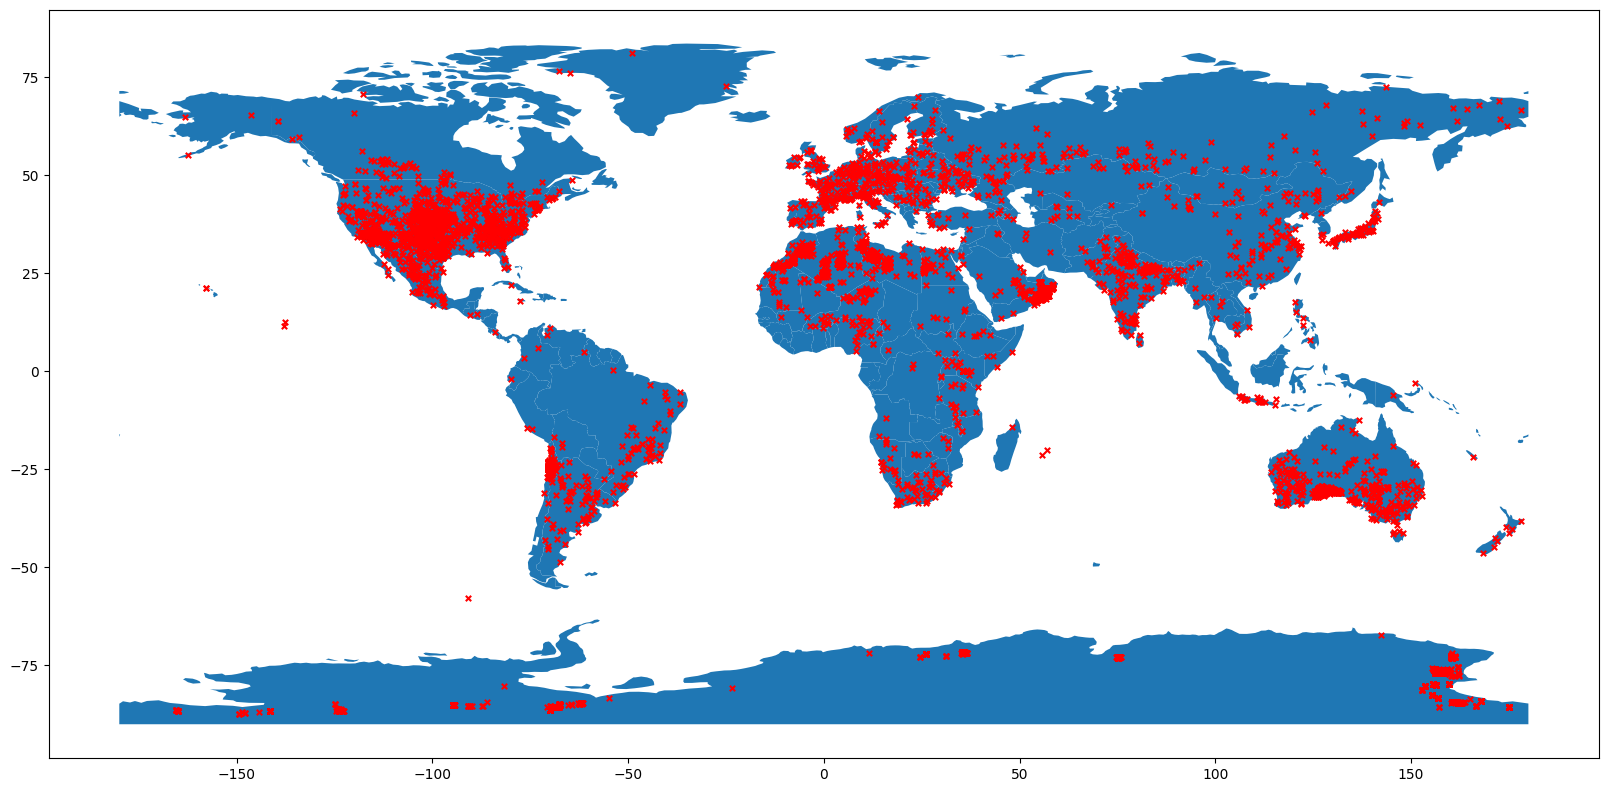

In [33]:
loc_geom = [Point(xy) for xy in zip(data['reclong'], data['reclat'])]
geo_df = gpd.GeoDataFrame(data, crs=loc_crs, geometry=loc_geom)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(20, 10)), marker='x', color='red', markersize=15)